# Customer Loyalty Segmentation using RFM(Recency, Frequency, Monetary) analysis.

Need of Customer Segmentation: Customers transactions needs to be analysed for profitable strategies.


Recency (R): Who have purchased recently? Number of days since last purchase (least recency).
Frequency (F): Who has purchased frequently? It means the total number of purchases. ( high frequency)
Monetary Value(M): Who have high purchase amount? It means the total money customer spent (high monetary value)

# importing packages 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# importing data-set

In [3]:
df = pd.read_excel(r'C:\Users\ashi\Desktop\OnlineRetail.xlsx')

We need her five columns CustomerID, InvoiceDate, InvoiceNo, Quantity, and UnitPrice. CustomerId will uniquely define our customers, InvoiceDate help us calculate recency of purchase, InvoiceNo helps us to count the number of time transaction performed(frequency). Quantity purchased in each transaction and UnitPrice of each unit purchased by the customer will help us to calculate the total purchased amount.

In [4]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [5]:
#customer distribution by country
cust_by_country=df[['Country','CustomerID']].drop_duplicates()
cust_by_country=cust_by_country.groupby(['Country'])['CustomerID'].aggregate('count').reset_index().sort_values("CustomerID",0,False)


In [6]:
cust_by_country

,Country,CustomerID
36,United Kingdom,3950
14,Germany,95
13,France,87
31,Spain,31
3,Belgium,25
33,Switzerland,21
27,Portugal,19
19,Italy,15
12,Finland,12
1,Austria,11


UK has maximum customers so it is better to group the customers here.

In [7]:
#KEEP ONLY UNITED KINGDOM DATA
df=df[df['Country']=='United Kingdom']

In [8]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom


Check the missing values column-wise(axis=0)

In [9]:
df.isnull().sum(axis=0)

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133600
Country             0
dtype: int64

We have 133600 missing CustomerID which must be removed and we can ignore 1454 missing descriptions here.

In [10]:
df = df.loc[df['CustomerID'].notnull()]

Check whether UnitPrice and Quantity are positive. If negative value exists then filter them out.

In [11]:
df.UnitPrice.min()

0.0

In [12]:
df.Quantity.min()

-80995

In [13]:
df=df[(df['Quantity']>0)]

Convert InvoiceDate to datetime and calculate TotalAmount (Quantity*UnitPrice)

In [14]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])

In [15]:
df['TotalAmount']=df['Quantity']*df['UnitPrice']

In [16]:
df.shape

(354345, 9)

In [17]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In order to calculate recency we need most recent date(fixed) which will be used to compute number of days since last purchase for each customers.
Obviously last purchase date of each customer may vary.

In [18]:
least_recent_date = df['InvoiceDate'].min()
most_recent_date = df['InvoiceDate'].max()

In [19]:
most_recent_date 

Timestamp('2011-12-09 12:49:00')

# Recency for customerID = 12346

In [20]:
#number of days since last purchase upto most recent date
(most_recent_date- df[(df['CustomerID']==12346.0)].InvoiceDate.max()).days


325

# Frquency for customerID = 12346

In [21]:
len(df[(df['CustomerID']==12346.0)].InvoiceNo)

1

A dictionary mapped from column names to aggregation functions(lambda funcyion:single-line function declared with no name), is still a perfectly good way to perform an aggregation.

In [22]:
RMFScores=df.groupby('CustomerID').agg({'InvoiceDate':lambda x: (most_recent_date-x.max()).days,"InvoiceNo":lambda x: len(x),"TotalAmount": lambda x: x.sum()})

In [23]:
RMFScores

,InvoiceDate,InvoiceNo,TotalAmount
CustomerID,,,
12346.0,325,1,77183.60
12747.0,1,103,4196.01
12748.0,0,4596,33719.73
12749.0,3,199,4090.88
12820.0,2,59,942.34
...,...,...,...
18280.0,277,10,180.60
18281.0,180,7,80.82
18282.0,7,12,178.05


In [24]:
RMFScores['InvoiceDate']=RMFScores['InvoiceDate'].astype(int)

In [25]:
RMFScores.rename(columns={'InvoiceDate':'Recency','InvoiceNo':'Frequency','TotalAmount':'MonetaryValue'},inplace=True)

In [26]:
RMFScores.reset_index().head()

,CustomerID,Recency,Frequency,MonetaryValue
0,12346.0,325,1,77183.60
1,12747.0,1,103,4196.01
2,12748.0,0,4596,33719.73
3,12749.0,3,199,4090.88
4,12820.0,2,59,942.34


In [27]:
RMFScores.Recency.describe()

count    3921.000000
mean       91.188472
std        99.528995
min         0.000000
25%        17.000000
50%        50.000000
75%       142.000000
max       373.000000
Name: Recency, dtype: float64

C:\Users\ashi\Anaconda3\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


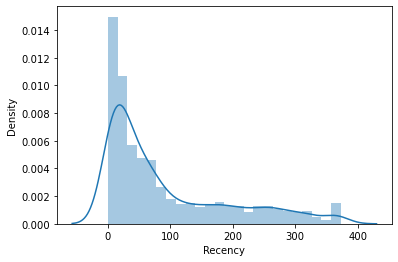

In [28]:
x=RMFScores.Recency
ax=sns.distplot(x)

Once we have calculated Recency, Frequency and MonetaryValue, we need to find Quantiles for each of them.

In [29]:
quantiles=RMFScores.quantile(q=[0.25,0.50,0.75])
quantiles           

,Recency,Frequency,MonetaryValue
0.25,17.0,17.0,300.04
0.50,50.0,41.0,651.82
0.75,142.0,99.0,1575.89


In [30]:
quantiles=quantiles.to_dict()

In [31]:
quantiles

{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 142.0},
 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 99.0},
 'MonetaryValue': {0.25: 300.03999999999996,
  0.5: 651.8199999999999,
  0.75: 1575.89}}

In [32]:
def RScoring(x,p,d):
    if x <= d[p][0.25]:
          return 1
    elif x <= d[p][0.50]:
          return 2
    elif x <= d[p][0.75]:
             return 3
    else:
          return 4
def FScoring(x,p,d):
    if x <= d[p][0.25]:
          return 4
    elif x <= d[p][0.50]:
          return 3
    elif x <= d[p][0.75]:
             return 2
    else:
          return 1


In [33]:
RMFScores['R']=RMFScores['Recency'].apply(RScoring,args=('Recency',quantiles,))
RMFScores['F']=RMFScores['Frequency'].apply(FScoring,args=('Frequency',quantiles,))
RMFScores['M']=RMFScores['MonetaryValue'].apply(FScoring,args=('MonetaryValue',quantiles,))
RMFScores.head()

,Recency,Frequency,MonetaryValue,R,F,M
CustomerID,,,,,,
12346.0,325,1,77183.60,4,4,1
12747.0,1,103,4196.01,1,1,1
12748.0,0,4596,33719.73,1,1,1
12749.0,3,199,4090.88,1,1,1
12820.0,2,59,942.34,1,2,2


In [34]:
RMFScores['RMFGroup']=RMFScores.R.map(str)+RMFScores.F.map(str)+RMFScores.M.map(str)
RMFScores['RMFScore']=RMFScores[['R','F','M']].sum(axis=1)

In [35]:
RMFScores.head()

,Recency,Frequency,MonetaryValue,R,F,M,RMFGroup,RMFScore
CustomerID,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9
12747.0,1,103,4196.01,1,1,1,111,3
12748.0,0,4596,33719.73,1,1,1,111,3
12749.0,3,199,4090.88,1,1,1,111,3
12820.0,2,59,942.34,1,2,2,122,5


In [36]:
LoyaltyLevel=['platinum','gold','silver','bronze']
Score_cut=pd.qcut(RMFScores.RMFScore,q=4,labels=LoyaltyLevel)
RMFScores['LoyaltyLevel']=Score_cut.values
RMFScores.reset_index().head()

,CustomerID,Recency,Frequency,MonetaryValue,R,F,M,RMFGroup,RMFScore,LoyaltyLevel
0,12346.0,325,1,77183.60,4,4,1,441,9,silver
1,12747.0,1,103,4196.01,1,1,1,111,3,platinum
2,12748.0,0,4596,33719.73,1,1,1,111,3,platinum
3,12749.0,3,199,4090.88,1,1,1,111,3,platinum
4,12820.0,2,59,942.34,1,2,2,122,5,platinum


In [37]:
RMFScores[RMFScores['RMFGroup']=='111'].sort_values('MonetaryValue',ascending=False).reset_index()

,CustomerID,Recency,Frequency,MonetaryValue,R,F,M,RMFGroup,RMFScore,LoyaltyLevel
0,18102.0,0,431,259657.30,1,1,1,111,3,platinum
1,17450.0,7,337,194550.79,1,1,1,111,3,platinum
2,17511.0,2,963,91062.38,1,1,1,111,3,platinum
3,16684.0,3,277,66653.56,1,1,1,111,3,platinum
4,14096.0,3,5111,65164.79,1,1,1,111,3,platinum
...,...,...,...,...,...,...,...,...,...,...
411,14759.0,4,102,1625.97,1,1,1,111,3,platinum
412,16987.0,2,129,1625.05,1,1,1,111,3,platinum
413,15172.0,8,110,1624.05,1,1,1,111,3,platinum
414,14178.0,8,327,1620.93,1,1,1,111,3,platinum


<AxesSubplot:xlabel='LoyaltyLevel', ylabel='count'>

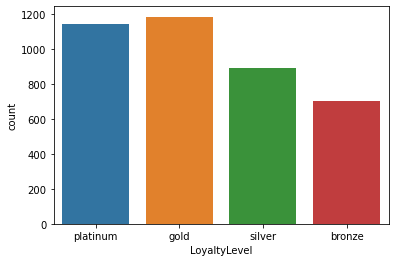

In [38]:
ax=sns.countplot(x='LoyaltyLevel',data=RMFScores)
ax

Text(0, 0.5, 'per segment')

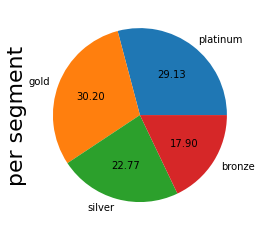

In [39]:
ax1=RMFScores.groupby('LoyaltyLevel').size().plot(kind='pie', autopct='%.2f')
ax1.set_ylabel('per segment', size=22)